To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [1]:
#install packages if required
#%pip install networkx

In [2]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [3]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [4]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['Berlin-Prenzlauerberg-Center']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [5]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/Berlin/pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [6]:
cities_dict = make_dict(cities)
cities_dict

{'Berlin-Prenzlauerberg-Center': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Prenzlauerberg-Center/Berlin-Prenzlauerberg-Center_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Prenzlauerberg-Center/Berlin-Prenzlauerberg-Center_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Prenzlauerberg-Center/Berlin-Prenzlauerberg-Center_trips.tntp.txt'}}}

# instantiate class

In [7]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [8]:
#set city for investigation
city = cities[0]

In [9]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,183,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
1,1,294,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
2,1,296,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
3,1,297,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
4,2,187,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
744,349,179,2400.0,156.0,24.666667,1.0,4.0,0.0,0.0,1
745,350,19,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
746,350,247,2400.0,379.0,14.000000,1.0,4.0,0.0,0.0,1
747,351,310,900.0,327.0,8.333333,1.0,4.0,0.0,0.0,1


# Plot graph

Total number of nodes in Berlin-Prenzlauerberg-Center: 352
Total number of edges in Berlin-Prenzlauerberg-Center: 749
Graph for: Berlin-Prenzlauerberg-Center


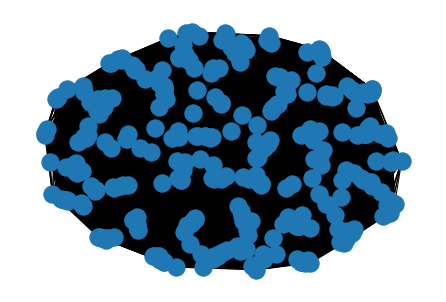

In [10]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [11]:
#observe network with all links
remove_link = 0 #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

Berlin-Prenzlauerberg-Center graph is: DiGraph with 352 nodes and 749 edges
Berlin-Prenzlauerberg-Center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
Berlin-Prenzlauerberg-Center flows are: {('1', '2'): 55.61, ('1', '3'): 75.59, ('1', '4'): 67.54, ('1', '5'): 74.33, ('1', '6'): 3.48, ('1', '7'): 7.58, ('1', '8'): 6.57, ('1', '9'): 40.16, ('1', '10'): 29.24, ('1', '11'): 69.6, ('1', '12'): 3.09, ('1', '13'): 10.79, ('1', '14'): 94.31, ('1', '15'): 24.88, ('1', '16'): 11.42, ('1', '17'): 30.33, ('1', '18'): 10.26, ('1', '19'): 1.26, ('1', '20'): 3.13, ('1', '21'): 12.74, ('1', '22'): 19.18, ('1', '23'): 40.82, ('1', '24'): 47.69, ('1', '25'): 3.13, ('1', '26'): 6.65, ('1', '27'): 5.53, ('1', '28'): 6.39, ('1', '29'): 9.25, ('1', '30'): 7.29, ('1', '31'): 28.69, ('1', '32'): 5.08, ('1', '33'): 7.98,

In [12]:
#observe network after removing one link
remove_link = 356
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

Berlin-Prenzlauerberg-Center graph is: DiGraph with 352 nodes and 748 edges
Berlin-Prenzlauerberg-Center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
Berlin-Prenzlauerberg-Center flows are: {('1', '2'): 55.61, ('1', '3'): 75.59, ('1', '4'): 67.54, ('1', '5'): 74.33, ('1', '6'): 3.48, ('1', '7'): 7.58, ('1', '8'): 6.57, ('1', '9'): 40.16, ('1', '10'): 29.24, ('1', '11'): 69.6, ('1', '12'): 3.09, ('1', '13'): 10.79, ('1', '14'): 94.31, ('1', '15'): 24.88, ('1', '16'): 11.42, ('1', '17'): 30.33, ('1', '18'): 10.26, ('1', '19'): 1.26, ('1', '20'): 3.13, ('1', '21'): 12.74, ('1', '22'): 19.18, ('1', '23'): 40.82, ('1', '24'): 47.69, ('1', '25'): 3.13, ('1', '26'): 6.65, ('1', '27'): 5.53, ('1', '28'): 6.39, ('1', '29'): 9.25, ('1', '30'): 7.29, ('1', '31'): 28.69, ('1', '32'): 5.08, ('1', '33'): 7.98,

# Compute equilibrium flow for example city using Frank-Wolfe algorithm

In [13]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = 0
trial_run.compute_link_flow(city, remove_link)

CPU times: user 13min 4s, sys: 20.9 s, total: 13min 25s
Wall time: 13min 50s


Results for: Berlin-Prenzlauerberg-Center
1  ->  183 :  861.3800000000002
1  ->  294 :  0.0
1  ->  296 :  0.0
1  ->  297 :  0.0
183  ->  1 :  878.21
183  ->  185 :  445.34739764064886
183  ->  306 :  1215.269370277374
183  ->  323 :  684.0382045444885
294  ->  1 :  0.0
294  ->  185 :  0.0
296  ->  1 :  0.0
296  ->  294 :  0.0
297  ->  1 :  0.0
2  ->  187 :  971.8793705977504
2  ->  242 :  706.9670540918709
2  ->  243 :  316.43167844095944
2  ->  245 :  544.0372005748366
187  ->  2 :  1856.9593172418695
187  ->  14 :  1386.8907751312245
187  ->  186 :  0.0
187  ->  190 :  864.7839866396686
187  ->  242 :  0.04228840406934339
242  ->  2 :  0.0
242  ->  187 :  0.0
242  ->  241 :  707.009342495939
243  ->  2 :  52.066923497158314
243  ->  240 :  316.43167844095944
245  ->  2 :  636.6190629663892
245  ->  190 :  626.487916455184
3  ->  200 :  0.0
3  ->  235 :  958.6199999999999
3  ->  318 :  0.0
3  ->  320 :  0.0
200  ->  3 :  353.62932990759964
200  ->  235 :  0.0
235  ->  3 :  0.0
235  ->

264  ->  265 :  0.0
264  ->  267 :  91.5124043173164
265  ->  29 :  0.0
265  ->  266 :  0.0
266  ->  29 :  390.34817427352885
266  ->  252 :  0.0
266  ->  264 :  0.03182572647101578
266  ->  271 :  0.0
30  ->  257 :  17.2
30  ->  258 :  248.27999999999994
30  ->  260 :  0.0
30  ->  341 :  0.0
257  ->  30 :  17.17
257  ->  36 :  17.2
258  ->  30 :  253.03000000000006
258  ->  36 :  146.27999999999997
258  ->  260 :  0.0
258  ->  337 :  390.3799999999998
260  ->  30 :  0.0
260  ->  36 :  0.0
260  ->  257 :  0.0
260  ->  341 :  0.0
341  ->  30 :  0.0
341  ->  36 :  0.0
341  ->  260 :  0.0
341  ->  337 :  0.0
31  ->  110 :  0.0
31  ->  111 :  0.0
31  ->  119 :  915.4113951744467
31  ->  141 :  786.108004595143
110  ->  31 :  1099.1572206833741
110  ->  111 :  0.0
111  ->  31 :  390.15055645613614
111  ->  119 :  0.0
111  ->  141 :  0.033517542437966105
119  ->  31 :  0.003955231894382078
119  ->  109 :  387.54932183696167
119  ->  116 :  527.9104984467248
141  ->  31 :  220.8776673981851
1

206  ->  231 :  0.0009403418930302048
209  ->  206 :  0.0
209  ->  226 :  38.412906041240724
209  ->  234 :  0.0
231  ->  211 :  0.0009403418930302048
207  ->  209 :  0.0
226  ->  224 :  38.412906041240724
211  ->  155 :  0.0009403418930302048
212  ->  214 :  667.3265276752708
212  ->  244 :  0.0
244  ->  241 :  0.0
213  ->  117 :  229.42693307893137
213  ->  218 :  0.0
215  ->  216 :  697.281208399523
216  ->  222 :  697.281208399523
222  ->  221 :  697.281208399523
222  ->  223 :  0.0
217  ->  213 :  229.42693307893137
227  ->  219 :  648.1910951381159
221  ->  88 :  697.281208399523
246  ->  212 :  667.3265276752708
307  ->  310 :  0.0
308  ->  300 :  0.0
240  ->  239 :  316.43167844095944
241  ->  214 :  707.009342495939
241  ->  242 :  0.0
247  ->  150 :  361.4469968192242
250  ->  70 :  0.0
253  ->  344 :  399.3099999999999
344  ->  343 :  0.0
344  ->  347 :  399.3099999999999
261  ->  269 :  0.01697012330227292
256  ->  253 :  0.0
256  ->  266 :  0.0
337  ->  338 :  390.37999999

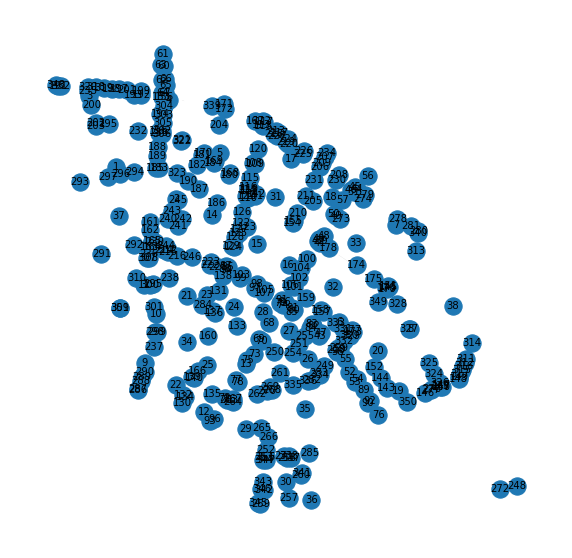

In [14]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Compute equilibrium flow for one closed link in example city using Frank-Wolfe algorithm

In [ ]:
%%time

#compute the eq flow for one example city and one closed link
remove_link = 356
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and one closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [ ]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
#view a network with edge removed
removed_link = 8
trial_run.make_network(city, removed_link)
trial_run.network_attributes(city, removed_link)

In [ ]:
%%time

trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

In [ ]:
## for below analysis, remember that the removed_link = 1 means the last row in the trip file is removed. 
# Removed_link = 2 means the second last row is removed, and so on.
# You can use this for the mapping from fw eq flow results to the csv/dataframe.


removed_link = 0
#density
nx.density(cities_dict[city][str(remove_link)]['network'].graph)

#diameter

#nx.diameter(cities_dict[city][str(remove_link)]['network'].graph)

#check this out for centrality https://networkx.org/documentation/stable/reference/algorithms/centrality.html

#betweeness origin

#eigenvector origin

#betweeness destination

#eigenvector destination

#flow - from initial trips file i think 

#cost - will need to compute